C:\Users\somap\AppData\Local\Temp\ipykernel_15800\2271215554.py:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  filtered_data['dt_txt'] = pd.to_datetime(filtered_data['dt_txt'])
C:\Users\somap\AppData\Local\Temp\ipykernel_15800\2271215554.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['dt_txt'] = pd.to_datetime(filtered_data['dt_txt'])
C:\Users\somap\AppData\Local\Temp\ipykernel_15800\2271215554.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

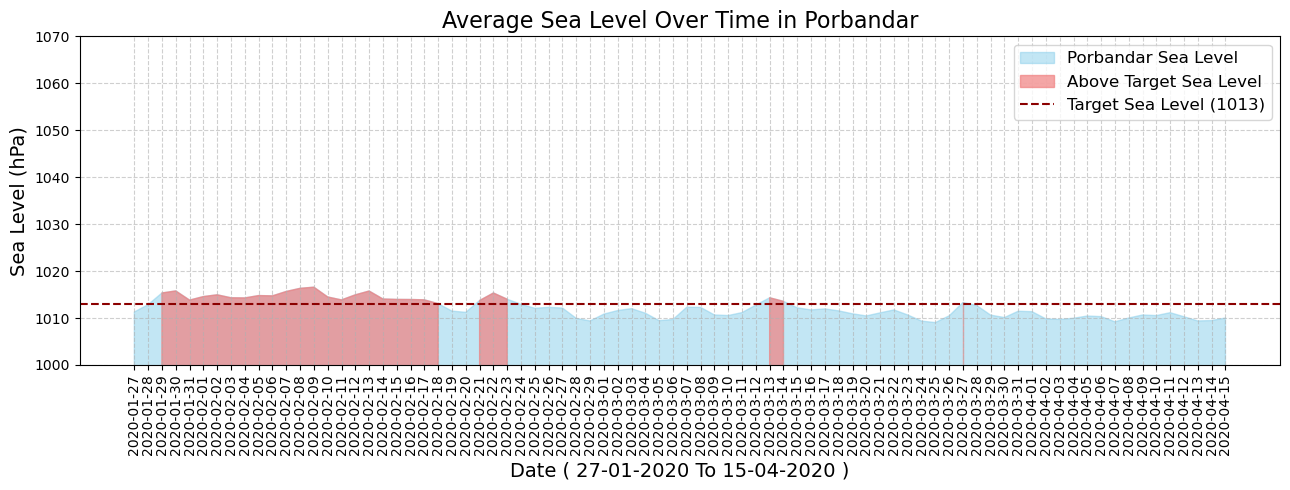

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('indiawheather.csv')

# Filter the data where city_name is 'Porbandar'
filtered_data = data[data['city_name'] == 'Porbandar']

# Convert 'dt_txt' to datetime
filtered_data['dt_txt'] = pd.to_datetime(filtered_data['dt_txt'])

# Group by date and calculate the average sea level
filtered_data['date'] = filtered_data['dt_txt'].dt.date
average_data = filtered_data.groupby('date')['sea_level'].mean().reset_index()

# Extract the x and y data
x = average_data['date']
y = average_data['sea_level']

# Define the target sea level for fishing
target_sea_level = 1013  # Adjust this value as needed

# Create the plot
plt.figure(figsize=(13, 5))

# Plot the average sea level as an area charta
plt.fill_between(x, y, color='skyblue', alpha=0.5, label='Porbandar Sea Level')

# Highlight the area where sea level is above the target
plt.fill_between(x, y, where=(y > target_sea_level), color='lightcoral', alpha=0.7, label='Above Target Sea Level')

# Add a horizontal line for the target sea level
plt.axhline(y=target_sea_level, color='darkred', linestyle='--', label=f'Target Sea Level ({target_sea_level})')

# Add titles and labels
plt.title('Average Sea Level Over Time in Porbandar', fontsize=16)
plt.xlabel('Date ( 27-01-2020 To 15-04-2020 )', fontsize=14)
plt.ylabel('Sea Level (hPa)', fontsize=14)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Set x-axis ticks to show every date
plt.xticks(ticks=x, labels=x, rotation=90, fontsize=10)

# Set the y-axis limit
plt.ylim(1000, 1070)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()
